In [47]:
from __future__ import print_function, division
import thinkstats2
import thinkplot
import sys
import numpy as np
import pandas
import random

In [4]:
def ReadClinicalData():
    df = pandas.read_csv('heart_failure_clinical_records_dataset.csv')
    return df

In [12]:
clincDat = ReadClinicalData()

3.) Include a histogram of each of the 5 variables – in your summary and analysis, identify any outliers and explain the reasoning for them being outliers and how you believe they should be handled (Chapter 2).

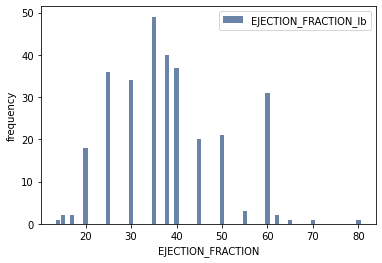

<Figure size 576x432 with 0 Axes>

In [13]:
hist = thinkstats2.Hist(clincDat.EJECTION_FRACTION, label='EJECTION_FRACTION_lb')
thinkplot.Hist(hist)
thinkplot.Show(xlabel='EJECTION_FRACTION', ylabel='frequency')

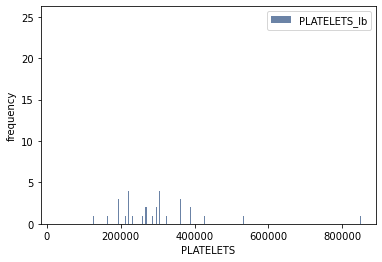

<Figure size 576x432 with 0 Axes>

In [14]:
hist = thinkstats2.Hist(clincDat.PLATELETS, label='PLATELETS_lb')
thinkplot.Hist(hist)
thinkplot.Show(xlabel='PLATELETS', ylabel='frequency')

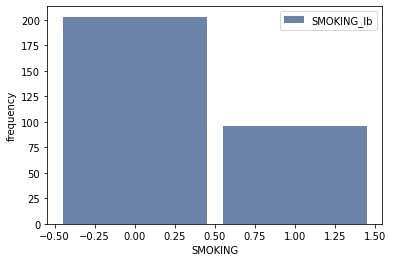

<Figure size 576x432 with 0 Axes>

In [15]:
hist = thinkstats2.Hist(clincDat.SMOKING, label='SMOKING_lb')
thinkplot.Hist(hist)
thinkplot.Show(xlabel='SMOKING', ylabel='frequency')

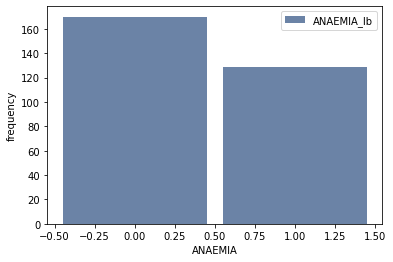

<Figure size 576x432 with 0 Axes>

In [17]:
hist = thinkstats2.Hist(clincDat.ANAEMIA, label='ANAEMIA_lb')
thinkplot.Hist(hist)
thinkplot.Show(xlabel='ANAEMIA', ylabel='frequency')

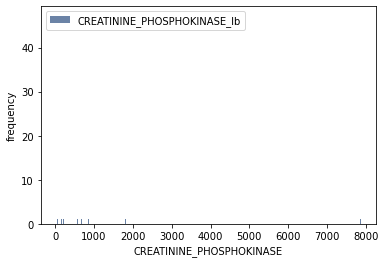

<Figure size 576x432 with 0 Axes>

In [62]:
hist = thinkstats2.Hist(clincDat.CREATININE_PHOSPHOKINASE, label='CREATININE_PHOSPHOKINASE_lb')
thinkplot.Hist(hist)
thinkplot.Show(xlabel='CREATININE_PHOSPHOKINASE', ylabel='frequency')

4.) Include the other descriptive characteristics about the variables: Mean, Mode, Spread, and Tails (Chapter 2).

In [20]:
mean_ejection_fraction  = clincDat.EJECTION_FRACTION.mean() 
var_ejection_fraction  = clincDat.EJECTION_FRACTION.var() 
std_ejection_fraction  = clincDat.EJECTION_FRACTION.std() 
mean_ejection_fraction, var_ejection_fraction, std_ejection_fraction

(38.08361204013378, 140.06345536576063, 11.834840741039173)

In [21]:
mean_platelets = clincDat.PLATELETS.mean()
var_platelets = clincDat.PLATELETS.var()
std_platelets = clincDat.PLATELETS.std()
mean_platelets, var_platelets, std_platelets

(263358.02926421416, 9565668749.44888, 97804.23686859828)

In [22]:
mean_smoking = clincDat.SMOKING.mean()
var_smoking = clincDat.SMOKING.var()
std_smoking = clincDat.SMOKING.std()
mean_smoking, var_smoking, std_smoking

(0.3210702341137124, 0.21871562927880447, 0.4676704280567721)

In [23]:
mean_anaemia = clincDat.ANAEMIA.mean()
var_anaemia = clincDat.ANAEMIA.var()
std_anaemia = clincDat.ANAEMIA.std()
mean_anaemia, var_anaemia, std_anaemia

(0.431438127090301, 0.2461224214944669, 0.49610726813307915)

In [24]:
mean_creatinine_phosphokinase = clincDat.CREATININE_PHOSPHOKINASE.mean()
var_creatinine_phosphokinase = clincDat.CREATININE_PHOSPHOKINASE.var()
std_creatinine_phosphokinase = clincDat.CREATININE_PHOSPHOKINASE.std()
mean_creatinine_phosphokinase, var_creatinine_phosphokinase, std_creatinine_phosphokinase

(581.8394648829432, 941458.5714574311, 970.2878807124363)

5.) Using pg. 29 of your text as an example, compare two scenarios in your data using a PMF. Reminder, this isn’t comparing two variables against each other – it is the same variable, but a different scenario. Almost like a filter. The example in the book is first babies compared to all other babies, it is still the same variable, but breaking the data out based on criteria we are exploring (Chapter 3).

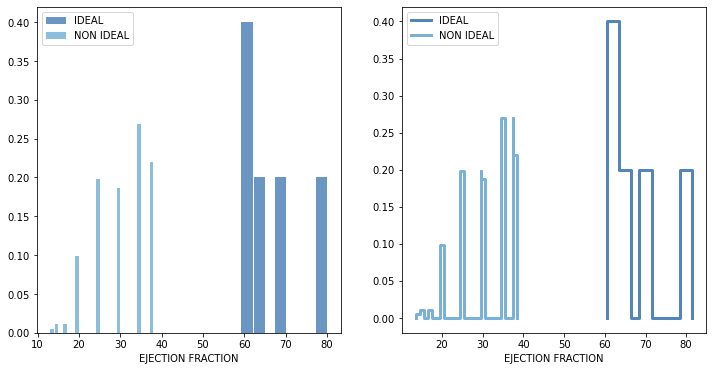

<Figure size 576x432 with 0 Axes>

In [32]:
ideal = clincDat[clincDat.EJECTION_FRACTION > 60]
notIdeal = clincDat[clincDat.EJECTION_FRACTION < 40]

ideal_pmf = thinkstats2.Pmf(ideal.EJECTION_FRACTION, label='IDEAL')
notIdeal_pmf = thinkstats2.Pmf(notIdeal.EJECTION_FRACTION, label='NON IDEAL')

thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(ideal_pmf, align='right')
thinkplot.Hist(notIdeal_pmf, align='right')
thinkplot.Config(xlabel = 'EJECTION FRACTION')
thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([ideal_pmf, notIdeal_pmf])
thinkplot.Show(xlabel='EJECTION FRACTION')

6.) Create 1 CDF with one of your variables, using page 41-44 as your guide, what does this tell you about your variable and how does it address the question you are trying to answer (Chapter 4).

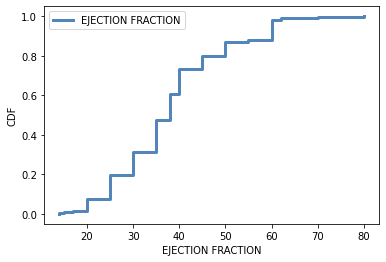

<Figure size 576x432 with 0 Axes>

In [37]:
ejectFrac_cdf = thinkstats2.Cdf(clincDat.EJECTION_FRACTION, label='EJECTION FRACTION')
thinkplot.PrePlot(2)
thinkplot.Cdf(ejectFrac_cdf)
thinkplot.Show(xlabel='EJECTION FRACTION', ylabel='CDF')

7.) Plot 1 analytical distribution and provide your analysis on how it applies to the dataset you have chosen (Chapter 5).

In [63]:
def MakeNormalPlot(creatPhos):
    mean, var = thinkstats2.TrimmedMeanVar(creatPhos, p=0.01)
    std = np.sqrt(var)

    xs = [-5, 5]
    xs, ys = thinkstats2.FitLine(xs, mean, std)
    thinkplot.Plot(xs, ys, color='0.8', label='model')

    xs, ys = thinkstats2.NormalProbability(creatPhos)
    thinkplot.Plot(xs, ys, label='CREATININE PHOSPHOKINASE')

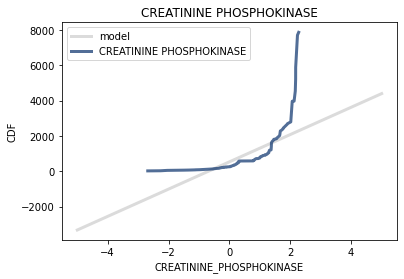

In [64]:
creatPhos = clincDat.CREATININE_PHOSPHOKINASE.dropna()
MakeNormalPlot(creatPhos)
thinkplot.Config(title='CREATININE PHOSPHOKINASE', xlabel='CREATININE_PHOSPHOKINASE',
                 ylabel='CDF', loc='upper left')

8.) Create two scatter plots comparing two variables and provide your analysis on correlation and causation. Remember, covariance, Pearson’s correlation, and Non-Linear Relationships should also be considered during your analysis (Chapter 7).

In [41]:
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

In [44]:
def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

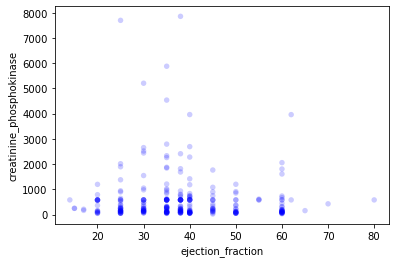

<Figure size 576x432 with 0 Axes>

In [40]:
ejection_fraction = clincDat.EJECTION_FRACTION
creatinine_phosphokinase = clincDat.CREATININE_PHOSPHOKINASE
thinkplot.Scatter(ejection_fraction, creatinine_phosphokinase)
thinkplot.Show(xlabel = 'ejection_fraction', ylabel = 'creatinine_phosphokinase')

In [42]:
Cov(ejection_fraction, creatinine_phosphokinase)

-504.4815606089415

In [45]:
Corr(ejection_fraction, creatinine_phosphokinase)

-0.044079554456711474

9.) Conduct a test on your hypothesis using one of the methods covered in Chapter 9.

In [48]:
class HypothesisTest(object):

    def __init__(self, data):
        self.data = data
        self.MakeModel()
        self.actual = self.TestStatistic(data)

    def PValue(self, iters=1000):
        self.test_stats = [self.TestStatistic(self.RunModel()) 
                           for _ in range(iters)]

        count = sum(1 for x in self.test_stats if x >= self.actual)
        return count / iters

    def TestStatistic(self, data):
        raise UnimplementedMethodException()

    def MakeModel(self):
        pass

    def RunModel(self):
        raise UnimplementedMethodException()

In [60]:
class CorrelationPermute(HypothesisTest):

    def TestStatistic(self, data):
        xs, ys = data
        test_stat = abs(thinkstats2.Corr(xs, ys))
        return test_stat

    def RunModel(self):
        xs, ys = self.data
        xs = np.random.permutation(xs)
        return xs, ys

In [61]:
data = clincDat.CREATININE_PHOSPHOKINASE, clincDat.DEATH_EVENT
ht = CorrelationPermute(data)
pvalue = ht.PValue()
pvalue

0.275

10.) For this project, conduct a regression analysis on either one dependent and one explanatory variable, or multiple explanatory variables (Chapter 10 & 11).

In [68]:
import statsmodels.formula.api as smf
formula = 'DEATH_EVENT ~ EJECTION_FRACTION'
model = smf.ols(formula, data=clincDat)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            DEATH_EVENT   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     23.09
Date:                Sun, 06 Jun 2021   Prob (F-statistic):           2.45e-06
Time:                        08:35:29   Log-Likelihood:                -185.33
No. Observations:                 299   AIC:                             374.7
Df Residuals:                     297   BIC:                             382.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.7253      0.08